In [2]:
import os
import matplotlib.pyplot as plt
import re
import sys
import numpy as np
from scipy.stats import norm
import scipy.integrate as integrate

import pandas as pd
font_size=25
lw=4

myblue = (0,119/235,187/235)
myred=(187/235,85/235,102/235)
myyellow=(221/235,170/235,51/235)
mygrey=(187/235,187/235,187/235)
mygreen="#66BB55"
mymagenta="#7733DD"

import matplotlib.ticker as mtick
plt.rc('xtick', labelsize=font_size) 
plt.rc('ytick', labelsize=font_size) 

from settings_and_potential import *

import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm

## Verify that we access the files with the right data

In [3]:
#######################################################
##### what do you want to run
#######################################################
## run the sample to check the look of the distributions 
path="/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/C++/overdamped/overdamped_2d/"

x_noada=np.hstack(openCfile(path+"vec_noada_xi=0.txt"))
y_noada=np.hstack(openCfile(path+"vec_noada_yi=0.txt"))
x_tr=np.hstack(openCfile(path+"vec_tr_xi=0.txt"))
y_tr=np.hstack(openCfile(path+"vec_tr_yi=0.txt"))
vec_g=np.hstack(openCfile(path+"vec_gi=0.txt"))

## Plot Data

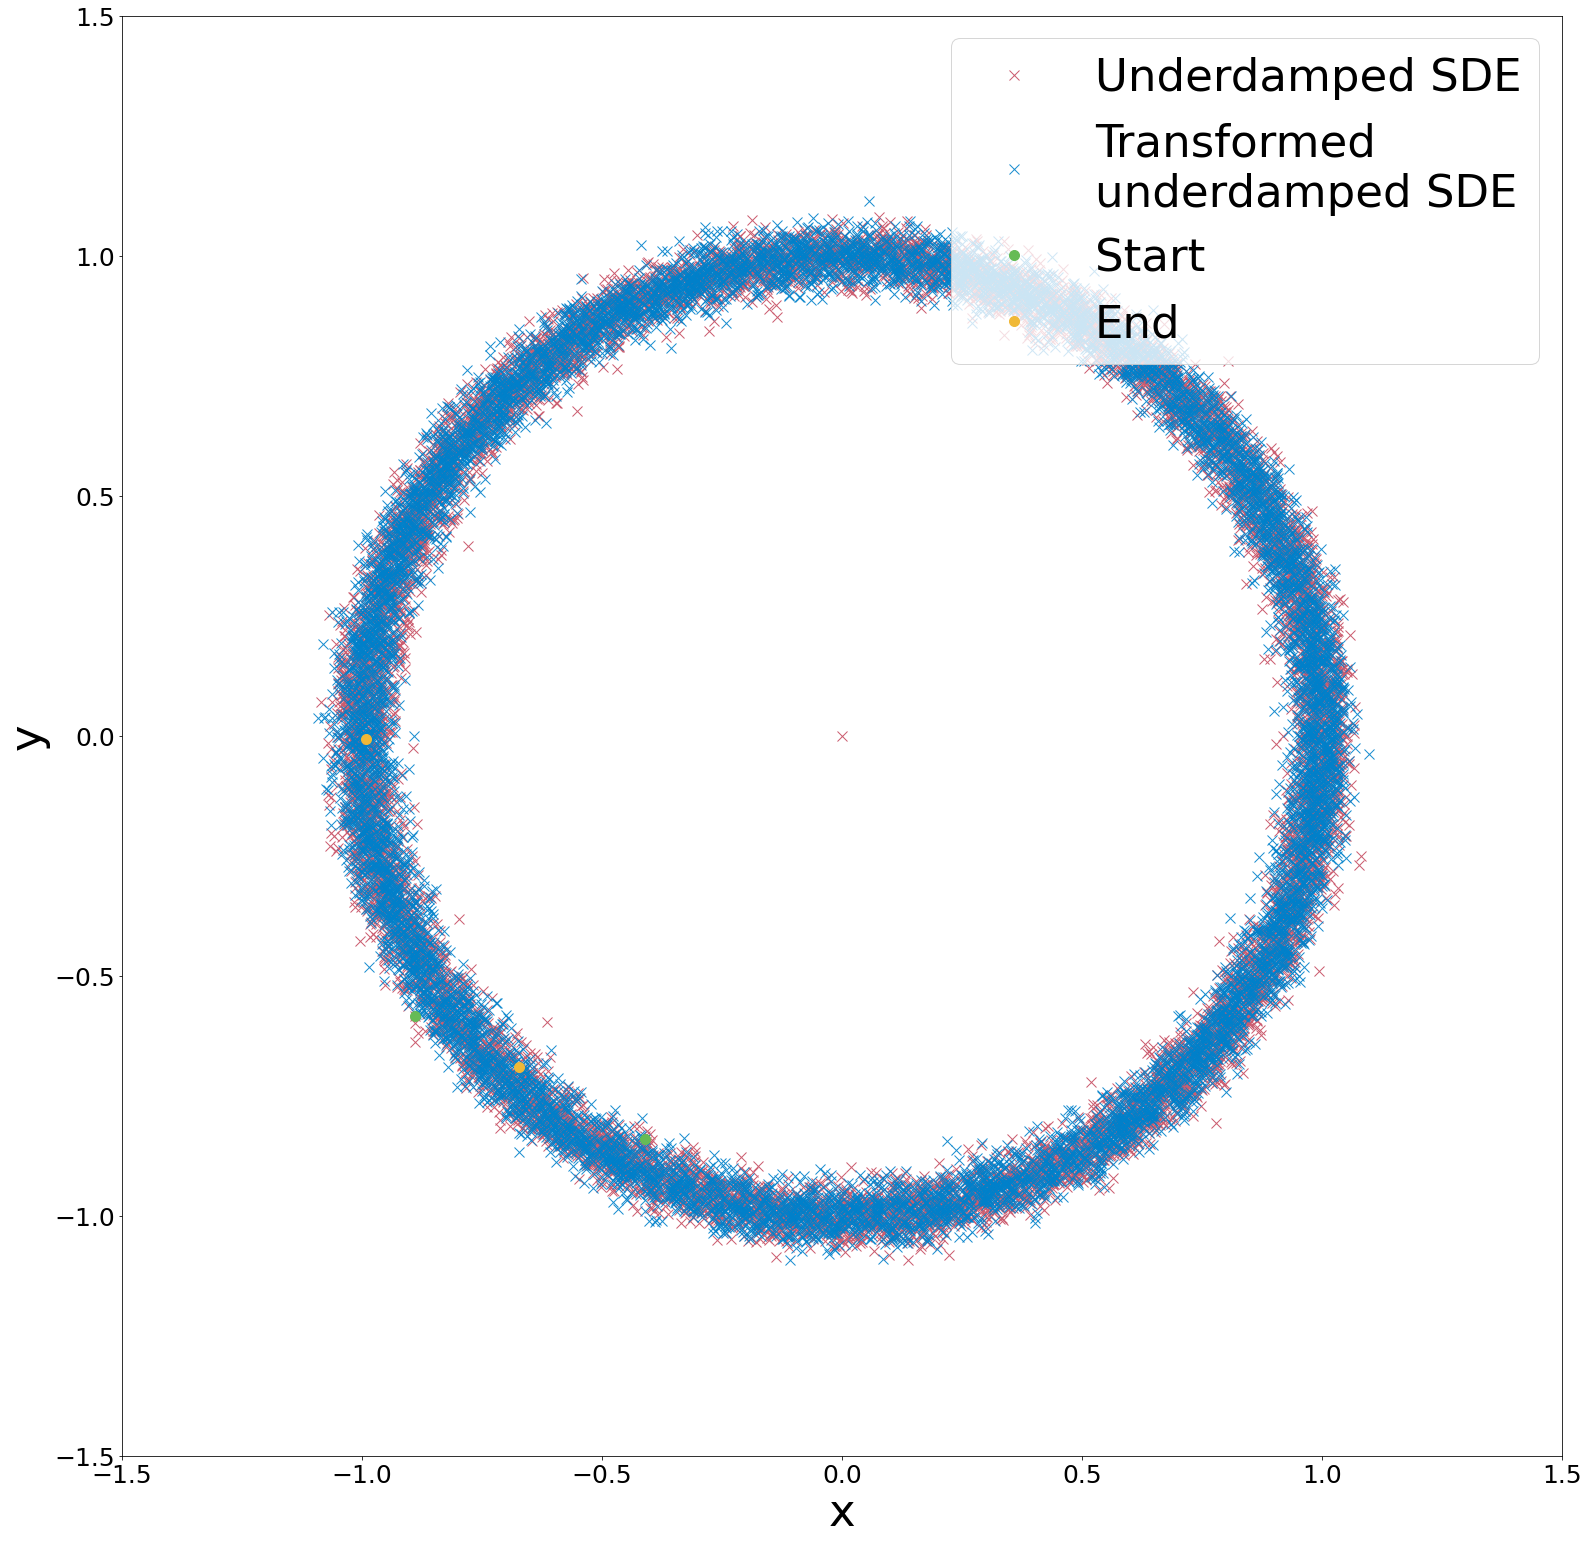

In [35]:
numsam=100
fig, ((ax))= plt.subplots(1,1,figsize=(25,25))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
nbins=100
range_bins=[-3.,3.]
font_size=45

i=9
path="/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/C++/overdamped/overdamped_2d/"

x_noada=np.hstack(openCfile(path+"vec_noada_xi=0.txt"))
y_noada=np.hstack(openCfile(path+"vec_noada_yi=0.txt"))
x_tr=np.hstack(openCfile(path+"vec_tr_xi=0.txt"))
y_tr=np.hstack(openCfile(path+"vec_tr_yi=0.txt"))
vec_g=np.hstack(openCfile(path+"vec_gi=0.txt"))

# X and Y
###
ax.plot(x_noada,y_noada,"x",markersize=10,linewidth=lw,label='Underdamped SDE',color=myred)
ax.plot(x_tr,y_tr,"x",markersize=10,linewidth=lw,alpha=0.9,label='Transformed\nunderdamped SDE',color=myblue)
# start point
ax.plot(x_noada[0],y_noada[0],"o",markersize=10.,linewidth=lw,color=mygreen)
ax.plot(x_tr[0],y_tr[0],"o",markersize=10,linewidth=lw,label='Start',color=mygreen)
#end point 
ax.plot(x_noada[-1],y_noada[-1],"o",markersize=10.,linewidth=lw,color=myyellow)
ax.plot(x_tr[-1],y_tr[-1],"o",markersize=10,linewidth=lw,label='End',color=myyellow)

ax.set_ylim(-1.5,1.5)
ax.set_xlim(-1.5,1.5)

ax.set_xlabel("x", fontsize=font_size)
ax.set_ylabel("y", fontsize=font_size)


ax.legend(fontsize=font_size,loc="upper right",ncol=1) #,bbox_to_anchor=(1.2, 1.42))


## Visualise 3d plots 

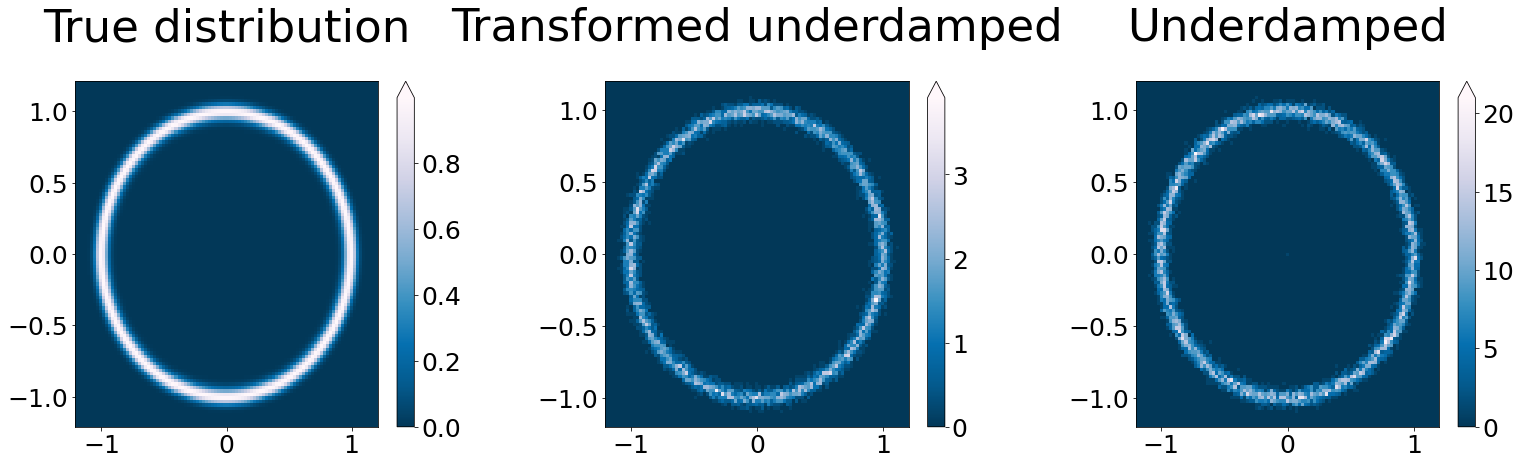

In [36]:
####################
##
#####################
tau=0.1
s=10
fig, (axs)= plt.subplots(1, 3,figsize=(25,6))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.4, 
                        hspace=0.4)
####################
## True distribution
#####################
beta=1/0.1
nbins=100
bound=1.2
X = np.linspace(-bound,bound,nbins)
Y = np.linspace(-bound,bound,nbins)
X, Y = np.meshgrid(X, Y)
Z = np.exp(-beta*s*(X**2 + Y**2-1)**2)
# fig = plt.figure(figsize=(20, 6))
axs[0].set_title('True distribution',fontsize=font_size,y=1.1)
axs[0].pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=np.exp(-1), vmax=1))
pcm = axs[0].pcolor(X, Y, Z, cmap='PuBu_r', shading='auto')
fig.colorbar(pcm, ax=axs[0], extend='max')
# plt.show()

####################
## Transformed distribution
#####################
nbins=100
xedges = np.linspace(-bound,bound,nbins)
yedges = np.linspace(-bound,bound,nbins)
H, xedges, yedges = np.histogram2d(x_tr, y_tr, bins=(xedges, yedges),density=True)
H.T
# fig = plt.figure(figsize=(20, 6))
axs[1].set_title('Transformed underdamped',fontsize=font_size,y=1.1)
X, Y = np.meshgrid(xedges, yedges)
axs[1].pcolormesh(X, Y, H, norm=colors.LogNorm(vmin=np.exp(-1), vmax=1))
pcm = axs[1].pcolor(X, Y, H, cmap='PuBu_r', shading='auto')
fig.colorbar(pcm, ax=axs[1], extend='max')
# plt.show()

####################
## Not adaptive distribution
#####################
nbins=100
xedges = np.linspace(-bound,bound,nbins)
yedges = np.linspace(-bound,bound,nbins)

H, xedges, yedges = np.histogram2d(x_noada, y_noada, bins=(xedges, yedges))
H.T
axs[2].set_title('Underdamped',fontsize=font_size,y=1.1)
X, Y = np.meshgrid(xedges, yedges)
axs[2].pcolormesh(X, Y, H, norm=colors.LogNorm(vmin=np.exp(-1), vmax=1))
pcm = axs[2].pcolor(X, Y, H, cmap='PuBu_r', shading='auto')
fig.colorbar(pcm, ax=axs[2], extend='max')
plt.show()

### Plot the anisotropic potential

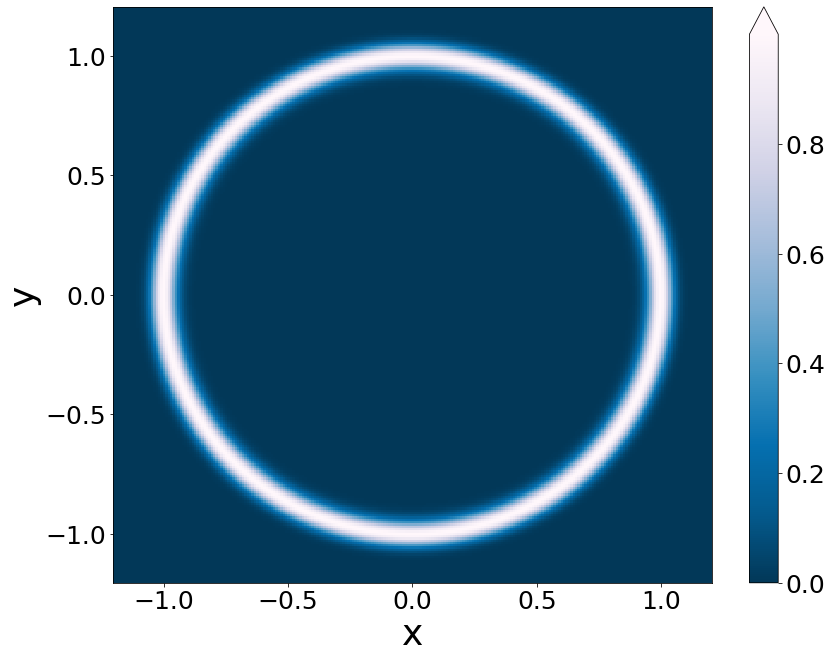

In [6]:
####################
##
#####################
tau=0.1
s=10
fig, (axs)= plt.subplots(1, 1,figsize=(13,10))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.4, 
                        hspace=0.4)
####################
## True distribution
#####################
beta=1/0.1
nbins=250
bound=1.2
X = np.linspace(-bound,bound,nbins)
Y = np.linspace(-bound,bound,nbins)
X, Y = np.meshgrid(X, Y)
Z = np.exp(-beta*s*(X**2 + Y**2-1)**2)
# fig = plt.figure(figsize=(20, 6))
# axs.set_title('True distribution',fontsize=font_size,y=1.1)
axs.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=np.min(Z), vmax=1))
pcm = axs.pcolor(X, Y, Z, cmap='PuBu_r', shading='auto')
fig.colorbar(pcm, ax=axs, extend='max')
axs.set_ylabel("y",fontsize=font_size*0.8)
axs.set_xlabel("x",fontsize=font_size*0.8)
os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/C++/overdamped/visualisation")

fig.savefig("figures/anisotropic_2d_plot.eps")


## Plot the adaptive function 

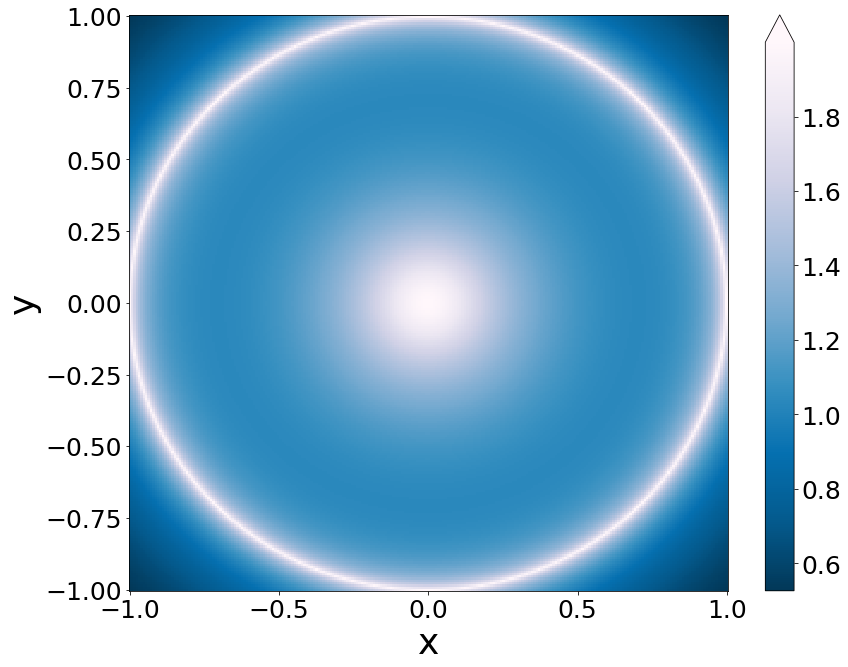

In [7]:
####################
##
#####################
tau=0.1
s=10
c=0.5
m1=5          
M1=1./2.  

fig, (axs)= plt.subplots(1, 1,figsize=(13,10))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.4, 
                        hspace=0.4)
####################
## True distribution
#####################
beta=1/0.1
nbins=250
bound=1.
X = np.linspace(-bound,bound,nbins)
Y = np.linspace(-bound,bound,nbins)
X, Y = np.meshgrid(X, Y)
F = abs(c*s*(X**2 + Y**2-1)*(X**2+Y**2))
F2=F*F
Xi=np.sqrt(1+m1*F)
G=(Xi/(M1*Xi+F))

# fig = plt.figure(figsize=(20, 6))
# axs.set_title('True distribution',fontsize=font_size,y=1.1)
axs.pcolormesh(X, Y, G, norm=colors.LogNorm(vmin=np.min(G), vmax=np.max(G)))
pcm = axs.pcolor(X, Y, G, cmap='PuBu_r', shading='auto')
fig.colorbar(pcm, ax=axs, extend='max')
axs.set_ylabel("y",fontsize=font_size*0.8)
axs.set_xlabel("x",fontsize=font_size*0.8)
os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/C++/overdamped/visualisation")

fig.savefig("figures/anisotropic_2d_gfunc.eps")

## Visualise 2D plots 

## Compute the moments in 2D
$$
\int_\Omega \int_\Omega \exp(-\beta (x^2+y^2-1)^2) x y dx dy =0\\
\int_\Omega \exp(-\beta (x^2+y^2-1)^2) x y dy =0\\
\int_\Omega  \exp(-\beta (x^2+y^2-1)^2) x y dx =0

$$
As the domain for integration is pair

In [8]:
## When no access to the true moment
true_mom_1 = 0
true_mom_2 = 0
true_mom_4 = 0

#############################################
range_int=[-15,15]
a=range_int[0]
b=range_int[1]
# norm=np.round(integrate.quad(lambda q: np.exp(-U(q)/tau), a,b)[0],16)
# true_mom_1 = np.round(integrate.quad(lambda q: np.exp(-U/tau)*U, a,b)[0],16)/norm
# true_mom_2 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*q*q, a,b)[0],16)/norm
# true_mom_3 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*(q)**3, a,b)[0],16)/norm
# true_mom_4 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*q*q*q*q, a,b)[0],16)/norm

def U(x,y):
    res=s*(x*x+y*y-1)*(x*x+y*y-1)
    return res

def target(x,y):
    return np.exp(-U(x,y)/tau)

def mom_3(x,y):

   return np.exp(-U(x,y)/tau)*U(x,y)
normalising_cst=integrate.dblquad(target,a,b,a,b)[0]
print(normalising_cst)
true_mom_3=integrate.dblquad(mom_3,a,b,a,b)[0]/normalising_cst
print(true_mom_3)

0.5568327996749912
0.0499999999930208


(0.8, 1.5)

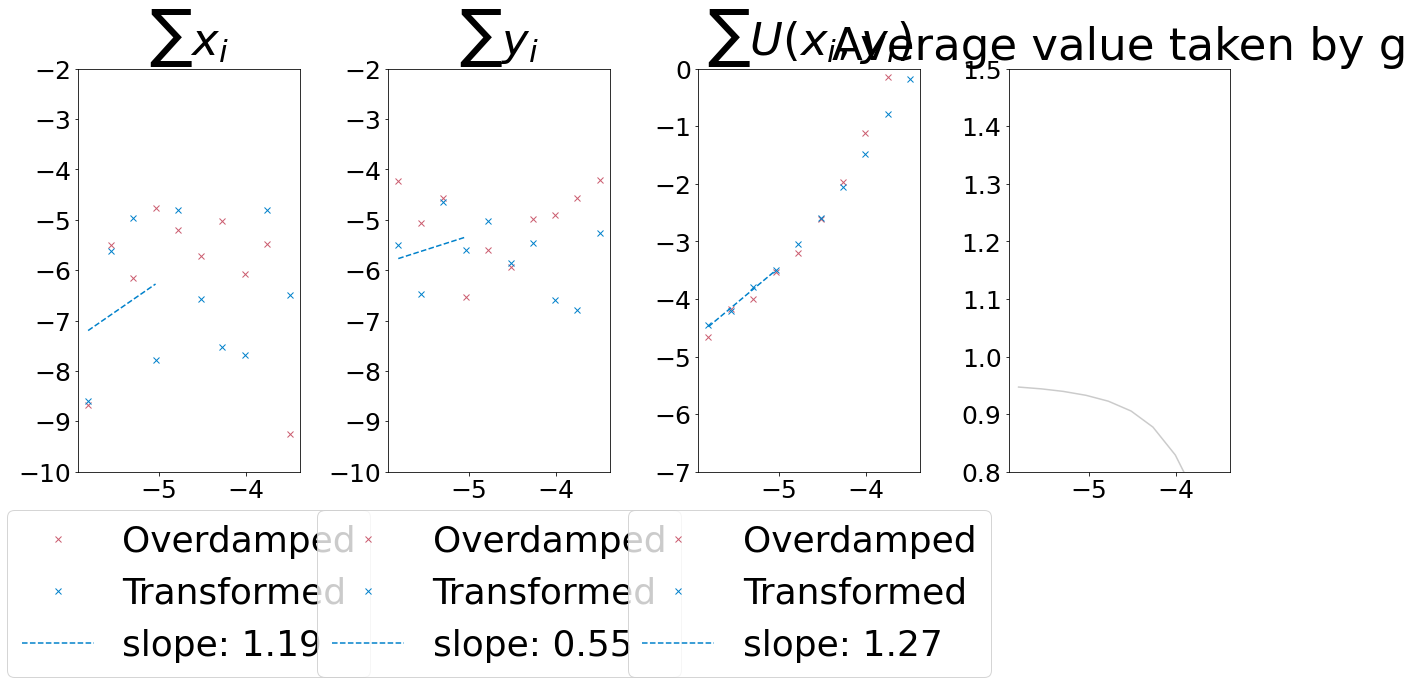

In [38]:
from settings_and_potential import *

# ###########################################
# ## Set up the path
# ###########################################
path="/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/C++/overdamped/"



# dtlist=np.array([0.01,0.02,0.03,0.04,0.05])
# dtlist=np.round(np.linspace(0.01,0.05,10),3) #np.round(np.linspace(0.01,0.09,10),3) #np.array([np.exp(-5.3), np.exp(-5.), np.exp(-4.79), np.exp(-4.53), np.exp(-4.27),np.exp(-4.02), np.exp(-3.76), np.exp(-3.51), np.exp(-3.25), np.exp(-3.)])
dtlist = np.array([0.003 , 0.0039, 0.005 , 0.0065, 0.0084, 0.0109, 0.014 , 0.0181,0.0234, 0.0302])

# ###########################################
# ## Interpolate the slope
# ###########################################
xm= np.log(dtlist)
lb=0
ub=-6
x = np.log(dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T

# ###########################################
# ## Compute the log moments
# ###########################################
fig, (ax1,ax2,ax3,ax4)= plt.subplots(1,4,figsize=(20,7))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

ax1.set_title("$\\sum x_i$",fontsize=font_size)
ax2.set_title("$\\sum y_i$",fontsize=font_size)
ax3.set_title("$\\sum U(x_i,y_i)$",fontsize=font_size)
ax4.set_title("Average value taken by g",fontsize=font_size)

## no adaptive 
###############
lab="Overdamped"

# Upload moments
mom1_list=np.hstack(openCfile(path+"overdamped_2d/noada_moment1.txt"))
mom2_list=np.hstack(openCfile(path+"overdamped_2d/noada_moment2.txt"))
mom3_list=np.hstack(openCfile(path+"overdamped_2d/noada_moment3.txt"))
# mom4_list=np.hstack(openCfile("overdamped_2d/noada_moment4.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)
# mom4_list=np.abs(mom4_list-true_mom_4)


#Plot moments
ax1.plot(xm,np.log(mom1_list),"x",color=myred,label=lab)
ax2.plot(xm,np.log(mom2_list),"x",color=myred,label=lab)
ax3.plot(xm,np.log(mom3_list),"x",color=myred,label=lab)
# ax4.plot(xm,np.log(mom4_list),"x",color=myred,label=lab)


## Transformed 
###############
lab="Transformed"

# Upload moments
mom1_list=np.hstack(openCfile(path+"overdamped_2d/tr_moment1.txt"))
mom2_list=np.hstack(openCfile(path+"overdamped_2d/tr_moment2.txt"))
mom3_list=np.hstack(openCfile(path+"overdamped_2d/tr_moment3.txt"))
g_vals=np.hstack(openCfile(path+"overdamped_2d/tr_moment4.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)
# mom4_list=np.abs(mom4_list-true_mom_4)

ax1.plot(xm,np.log(mom1_list),"x",color=myblue,label=lab)
ax2.plot(xm,np.log(mom2_list),"x",color=myblue,label=lab)
ax3.plot(xm,np.log(mom3_list),"x",color=myblue,label=lab)
ax4.plot(xm,g_vals,"-",color=mygrey,label=lab)


## interpolation linear  
#first moment
m, c = np.linalg.lstsq(A, np.log(mom1_list)[lb:ub], rcond=None)[0]
ax1.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myblue)
#second moment
m, c = np.linalg.lstsq(A, np.log(mom2_list)[lb:ub], rcond=None)[0]
ax2.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myblue)
#third moment
m, c = np.linalg.lstsq(A, np.log(mom3_list)[lb:ub], rcond=None)[0]
ax3.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myblue)
# #fourth moment
# m, c = np.linalg.lstsq(A, np.log(mom4_list)[lb:ub], rcond=None)[0]
# ax4.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myblue)


ax1.legend(fontsize=font_size*0.8,ncol=1,loc="upper center", bbox_to_anchor=(0.5, -0.05))
ax2.legend(fontsize=font_size*0.8,ncol=1,loc="upper center", bbox_to_anchor=(0.5, -0.05))
ax3.legend(fontsize=font_size*0.8,ncol=1,loc="upper center", bbox_to_anchor=(0.5, -0.05))
# ax4.legend(fontsize=font_size*0.8,ncol=1,loc="upper center",bbox_to_anchor=(0.5, -0.05))

##
ax1.set_ylim(-10,-2)
ax2.set_ylim(-10,-2)
ax3.set_ylim(-7,-0)
ax4.set_ylim(0.8,1.5)

# path="/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/C++/overdamped/visualisation/"

# fig.savefig(path+"figures/moments_logplot_2d.eps")




In [11]:
dtlist = np.array([np.exp(-4.5),np.exp(-4.21),np.exp(-3.93),np.exp(-3.64),np.exp(-3.36),np.exp(-3.07),np.exp(-2.79),np.exp(-2.5),np.exp(-2.21),np.exp(-1.93),np.exp(-1.64),np.exp(-1.36),np.exp(-1.07),np.exp(-0.79),np.exp(-0.5)])
np.exp(-4.5)

0.011108996538242306

## Look at trajectories and see how the transform makes the system evolves


/home/s2133976/.local/lib/python3.8/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


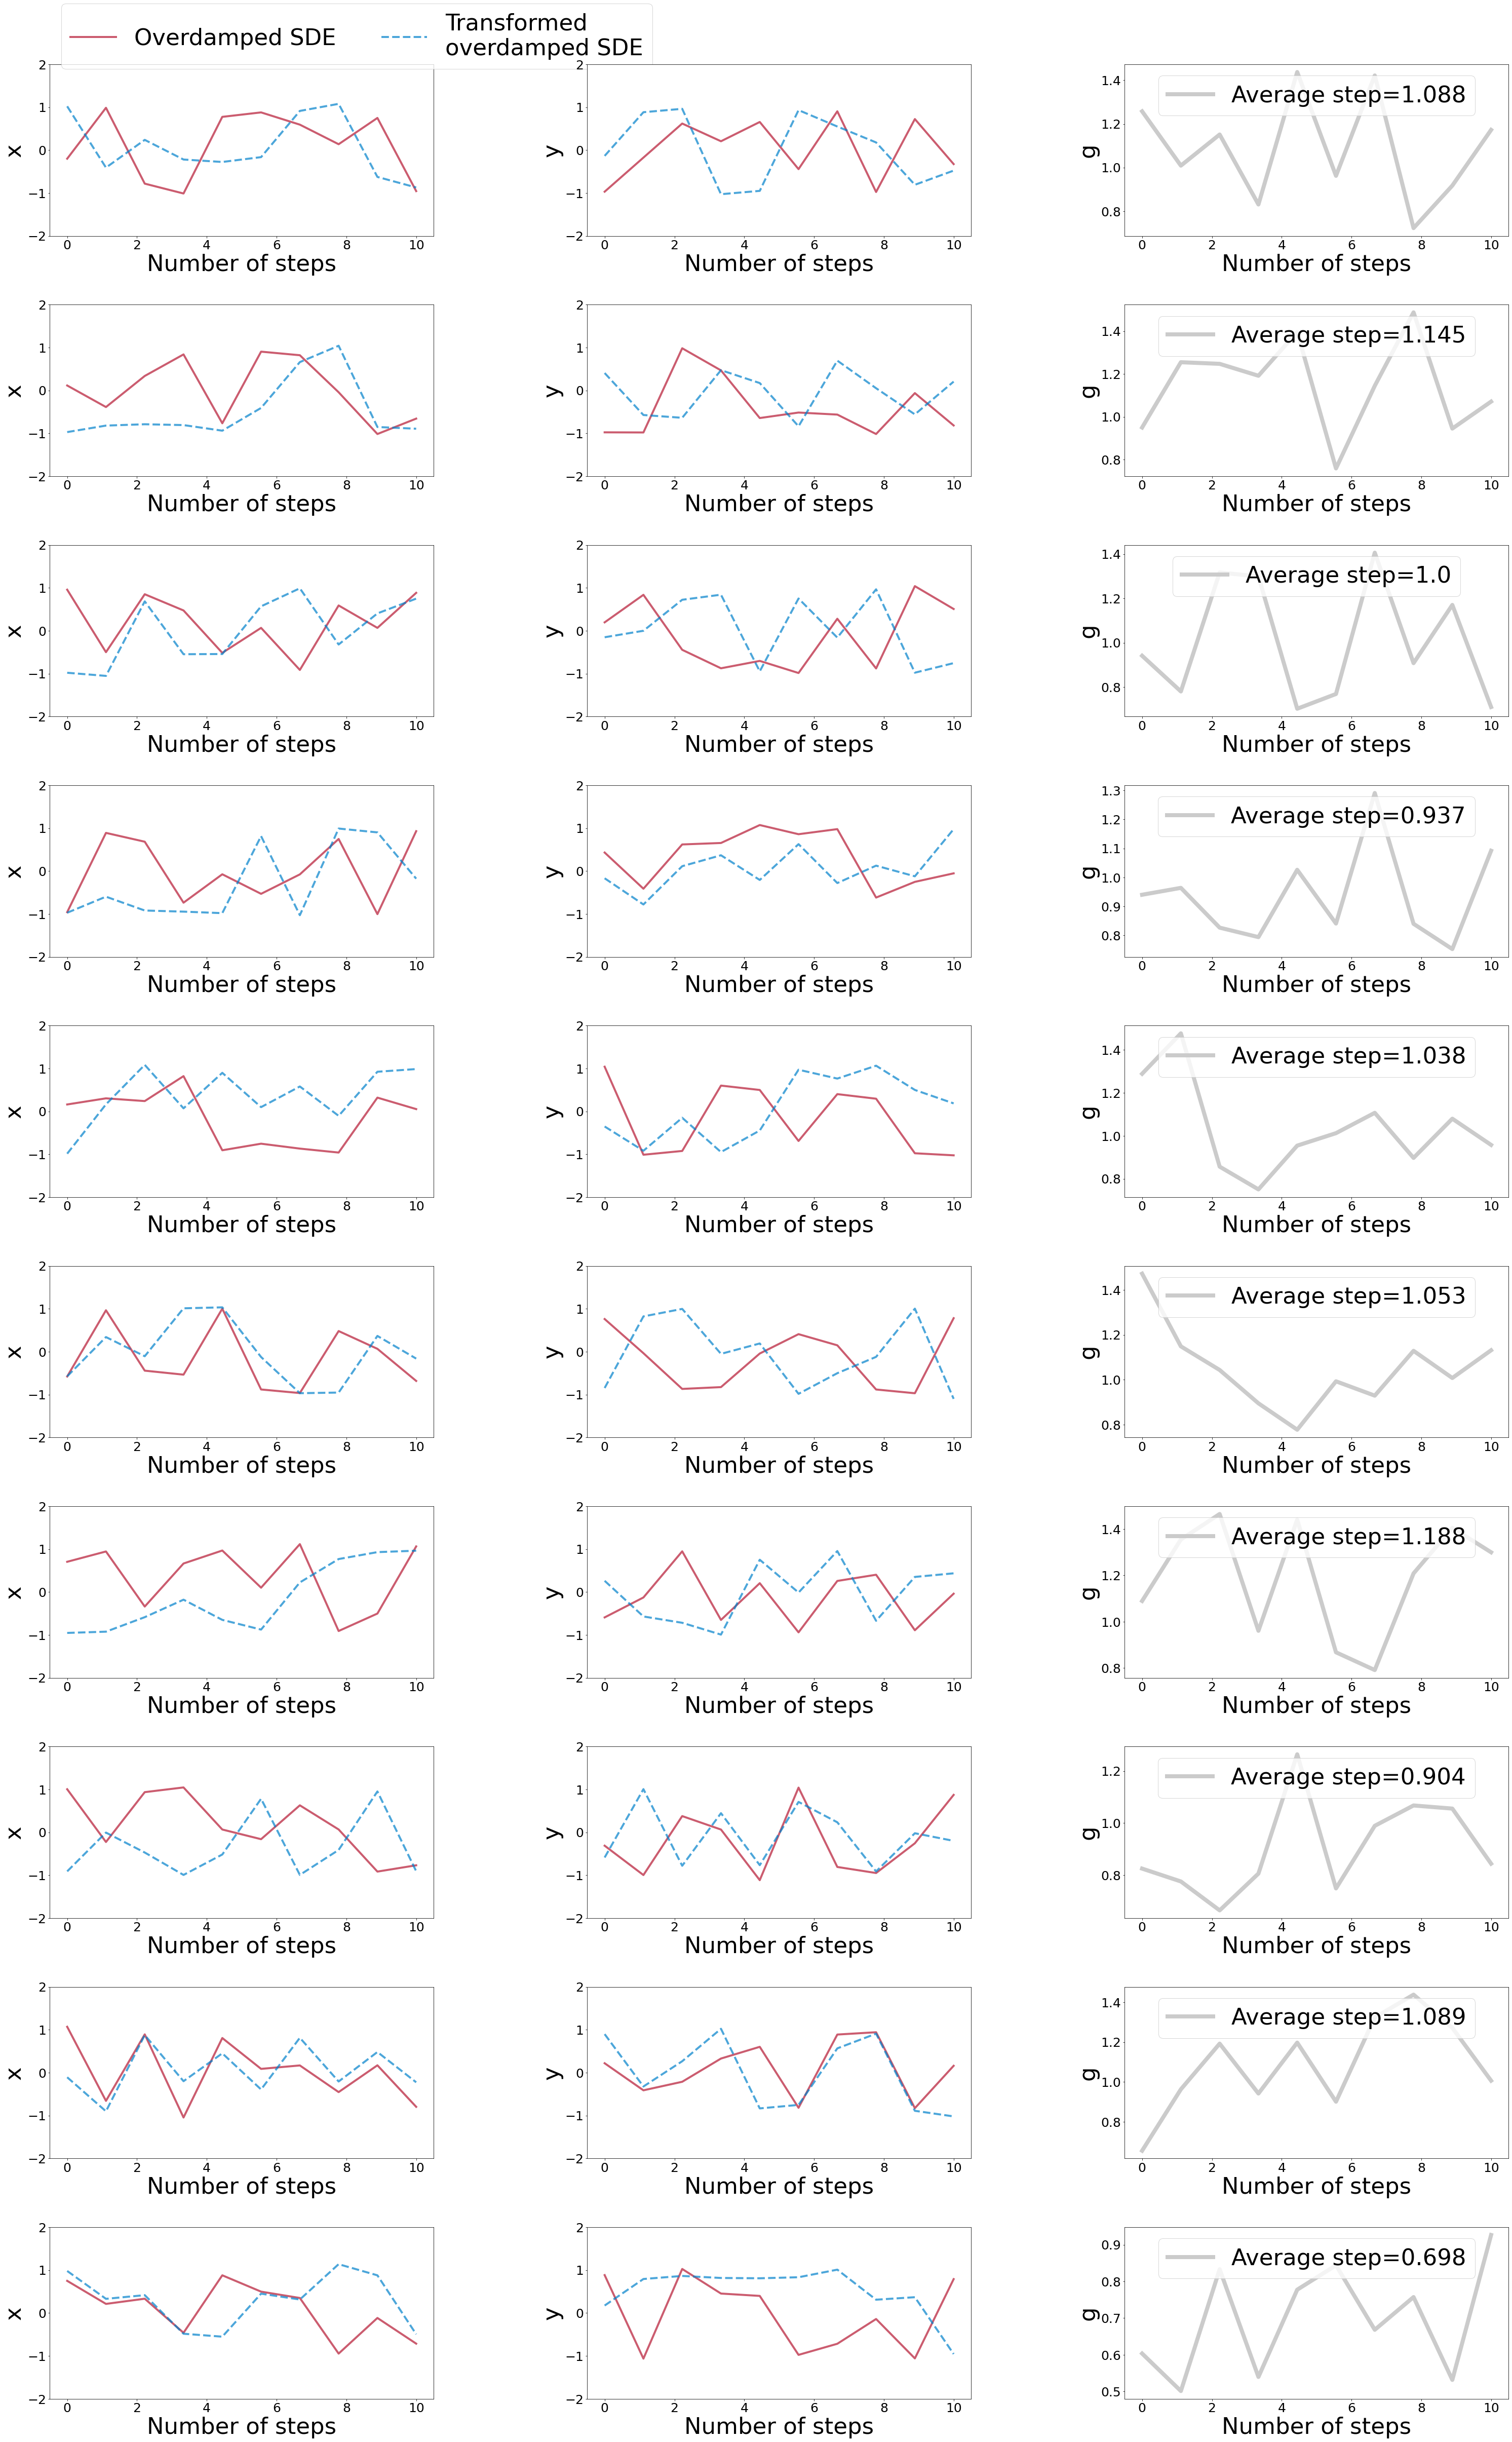

In [29]:
path="/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/C++/overdamped/overdamped_2d/"

numsam=10
numruns=int(500/0.03)
M=1/1.5
m=0.5

fig, ((axs))= plt.subplots(numsam,3,figsize=(50,80))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
nbins=100
range_bins=[-3.,3.]
font_size=45

for i in range(numsam):
    x_noada=np.hstack(openCfile(path+"vec_noada_xi="+str(i)+".txt"))
    y_noada=np.hstack(openCfile(path+"vec_noada_yi="+str(i)+".txt"))
    x_tr=np.hstack(openCfile(path+"vec_tr_xi="+str(i)+".txt"))
    y_tr=np.hstack(openCfile(path+"vec_tr_yi="+str(i)+".txt"))
    vec_g=np.hstack(openCfile(path+"vec_gi="+str(i)+".txt"))

    t=np.linspace(0,len(x_noada),len(x_noada))

    # X
    ###6
    axs[i,0].plot(t,x_noada,"-",linewidth=lw,label='Overdamped SDE',color=myred)
    axs[i,0].plot(t,x_tr,"--",linewidth=lw,alpha=0.7,label='Transformed\noverdamped SDE',color=myblue)
    axs[i,0].set_ylim(-2.1,2.1)
    axs[i,0].set_ylabel("x", fontsize=font_size)
    axs[i,0].set_xlabel("Number of steps", fontsize=font_size)
    axs[i,0].set_ylim(-2,2)



    ############
    ## Y vals ## 
    ############

    axs[i,1].plot(t,y_noada,"-",linewidth=lw,label='Overdamped SDE',color=myred)
    axs[i,1].plot(t,y_tr,"--",linewidth=lw,alpha=0.7,label='Transformed\noverdamped SDE',color=myblue)
    axs[i,1].set_ylabel("y", fontsize=font_size)
    axs[i,1].set_xlabel("Number of steps", fontsize=font_size)
    axs[i,1].set_ylim(-2,2)

    ############
    ## Histograms g vals ## 
    ############
    range_bins_g=[0,M+0.1]
    histogram_g,bins = np.histogram(vec_g,bins=nbins,range=range_bins_g, density=True)
    midx_noada = (bins[0:-1]+bins[1:])/2
    mean_g=round(np.mean(vec_g),3)

    axs[i,2].plot(t,vec_g,linewidth=lw*2,label='Average step='+str(mean_g),color=mygrey)
    axs[i,2].legend(fontsize=font_size, loc="upper center")
    axs[i,2].set_ylabel("g", fontsize=font_size)
    axs[i,2].set_xlabel("Number of steps", fontsize=font_size)

axs[0,0].legend(fontsize=font_size,loc="upper center",ncol=3,bbox_to_anchor=(0.8, 1.42))

os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/C++/overdamped/visualisation")
fig.savefig("figures/chains_anisotropic_2d.eps",dpi=1000)
fig.savefig("figures/chains_anisotropic_2d.pdf")

In [30]:
vec_g

array([0.60337833, 0.50120386, 0.8330515 , 0.53966015, 0.77732999,
       0.8438149 , 0.66811443, 0.75726603, 0.53156481, 0.92647644])

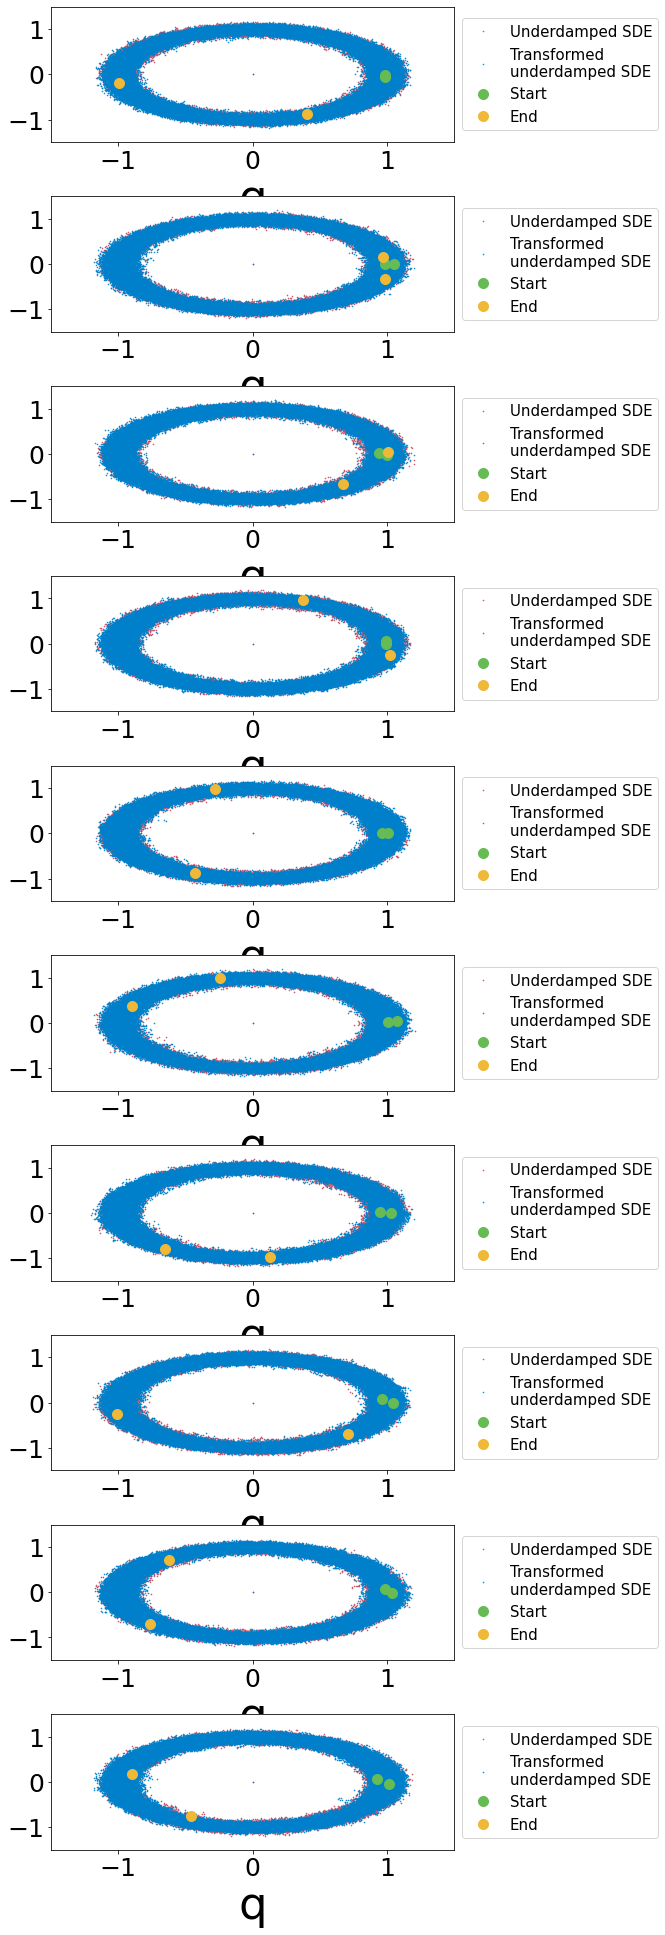

In [15]:
os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/C/data_overdamped_fewtraj_2d")
numsam=10

fig, ((axs))= plt.subplots(numsam,1,figsize=(7,32))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
nbins=100
range_bins=[-3.,3.]
font_size=45

for i in range(numsam):
    x_noada=np.hstack(openCfile("vec_noada_x"+str(i)+".txt"))
    y_noada=np.hstack(openCfile("vec_noada_y"+str(i)+".txt"))
    x_tr=np.hstack(openCfile("vec_tr_x"+str(i)+".txt"))
    y_tr=np.hstack(openCfile("vec_tr_y"+str(i)+".txt"))
    vec_g=np.hstack(openCfile("vec_g"+str(i)+".txt"))

    # Q
    ###
    axs[i].plot(x_noada,y_noada,"x",markersize=1,linewidth=lw,label='Underdamped SDE',color=myred)
    axs[i].plot(x_tr,y_tr,"x",markersize=1,linewidth=lw,alpha=0.9,label='Transformed\nunderdamped SDE',color=myblue)
    # start point
    axs[i].plot(x_noada[0],y_noada[0],"o",markersize=10.,linewidth=lw,color=mygreen)
    axs[i].plot(x_tr[0],y_tr[0],"o",markersize=10,linewidth=lw,label='Start',color=mygreen)
    #end point 
    axs[i].plot(x_noada[-2],y_noada[-2],"o",markersize=10.,linewidth=lw,color=myyellow)
    axs[i].plot(x_tr[-2],y_tr[-2],"o",markersize=10,linewidth=lw,label='End',color=myyellow)

    axs[i].set_ylim(-1.5,1.5)
    axs[i].set_xlim(-1.5,1.5)

    axs[i].set_xlabel("q", fontsize=font_size)

    axs[i].legend(fontsize=font_size/3,ncol=1,loc='center left', bbox_to_anchor=(1, 0.5))



## Plot 3D data

Tr ada
x
0.021827727067878947
y
0.13747136559938786
gmean
0.39807363786897054


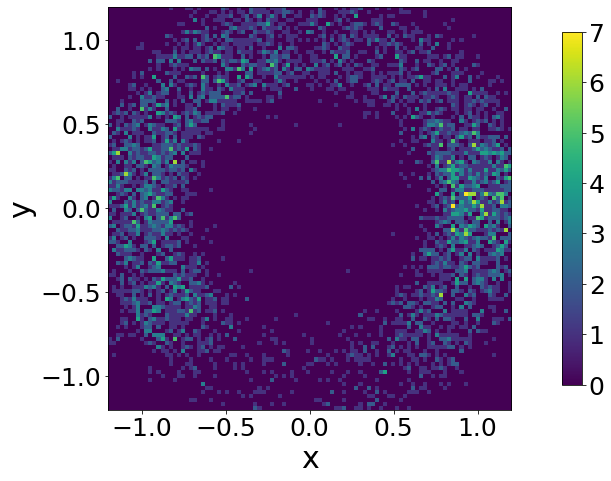

In [100]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt

fig, ((axs))= plt.subplots(1,1,figsize=(7,7))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

e=1.2
burnin=1
nbins=100
sf=1.5
def selection(XY, limitXY=[[-e,+e],[-e,+e]]):
        XY_select = []
        for elt in XY:
            if elt[0] > limitXY[0][0] and elt[0] < limitXY[0][1] and elt[1] > limitXY[1][0] and elt[1] < limitXY[1][1]:
                XY_select.append(elt)

        return np.array(XY_select)

os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/C/data_overdamped_fewtraj_2d")
## Transformed example
i=2

## Transformed
# axs[0].set_title("Transformed",fontsize=font_size/sf)
x=np.hstack(openCfile("vec_tr_x"+str(i)+".txt"))[burnin:-1]
y=np.hstack(openCfile("vec_tr_y"+str(i)+".txt"))[burnin:-1]
XY = np.stack((x,y),axis=-1)
XY_select = XY #selection(XY, limitXY=[[-e,+e],[-e,+e]])
heatmap, xedges, yedges = np.histogram2d(XY_select[:,0], XY_select[:,1], bins = nbins, range = [[-e,e],[-e,e]])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
im1=axs.imshow(heatmap.T, extent=extent, origin='lower',vmin=np.min(heatmap),vmax=np.max(heatmap))
axs.set_ylabel("y",fontsize=font_size/sf)
axs.set_xlabel("x",fontsize=font_size/sf)
print("Tr ada")
print("x")
print(np.mean(x))
print("y")
print(np.mean(y))
g=np.hstack(openCfile("vec_g"+str(i)+".txt"))
print("gmean")
print(np.mean(g))

cbar_ax = fig.add_axes([1., 0.15, 0.04, 0.7])
fig.colorbar(im1, cax=cbar_ax)

os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/C++/overdamped/visualisation")
fig.savefig("figures/chains_anisotropic_2d_tr.eps",dpi=1000)
fig.savefig("figures/chains_anisotropic_2d_tr.pdf")

Tr ada
x
0.015307304372424951
y
-0.012331292765819854
gmean
0.09867432395016153
gmean
0.0110673
Non ada
x
0.015307304372424951
y
-0.012331292765819854


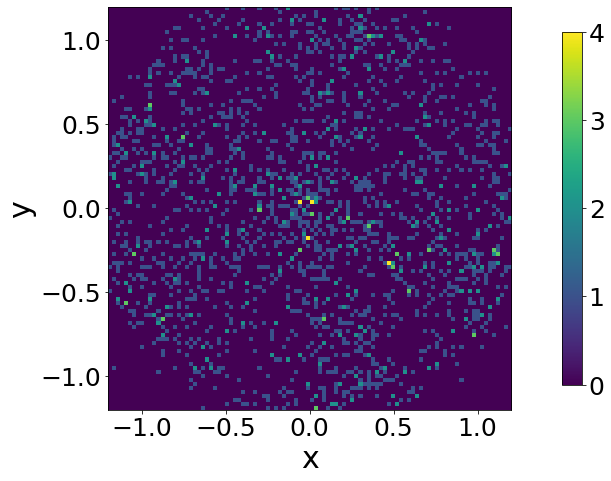

In [105]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt

fig, ((axs))= plt.subplots(1,1,figsize=(7,7))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

e=1.2
burnin=1
nbins=100
sf=1.5
def selection(XY, limitXY=[[-e,+e],[-e,+e]]):
        XY_select = []
        for elt in XY:
            if elt[0] > limitXY[0][0] and elt[0] < limitXY[0][1] and elt[1] > limitXY[1][0] and elt[1] < limitXY[1][1]:
                XY_select.append(elt)

        return np.array(XY_select)

os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/C/data_overdamped_fewtraj_2d")
## Transformed example
i=2

## Non adaptive
x=np.hstack(openCfile("vec_noada_x"+str(i)+".txt"))[burnin:-1]
y=np.hstack(openCfile("vec_noada_y"+str(i)+".txt"))[burnin:-1]
XY = np.stack((x,y),axis=-1)
XY_select = XY #selection(XY, limitXY=[[-e,+e],[-e,+e]])
heatmap, xedges, yedges = np.histogram2d(XY_select[:,0], XY_select[:,1], bins = nbins, range = [[-e,e],[-e,e]])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
im1=axs.imshow(heatmap.T, extent=extent, origin='lower',vmin=np.min(heatmap),vmax=np.max(heatmap))
axs.set_ylabel("y",fontsize=font_size/sf)
axs.set_xlabel("x",fontsize=font_size/sf)
print("Tr ada")
print("x")
print(np.mean(x))
print("y")
print(np.mean(y))
g=np.hstack(openCfile("vec_g"+str(i)+".txt"))
print("gmean")
print(np.mean(g))

cbar_ax = fig.add_axes([1., 0.15, 0.04, 0.7])
fig.colorbar(im1, cax=cbar_ax)
#le("Origina adaptive",fontsize=font_size/sf)

g=np.hstack(openCfile("vec_g"+str(i)+".txt"))
print("gmean")
print(np.min(g))
print("Non ada")
print("x")
print(np.mean(x))
print("y")
print(np.mean(y))

os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/C++/overdamped/visualisation")
fig.savefig("figures/chains_anisotropic_2d_noada.eps",dpi=1000)
fig.savefig("figures/chains_anisotropic_2d_noada.pdf")


In [104]:
500/(0.09*0.39)

14245.014245014245

In [26]:
XY

array([[ 0.985833 , -0.0229184],
       [ 1.0675   , -0.0601073],
       [ 1.00681  , -0.0357045],
       ...,
       [-1.0119   , -0.160206 ],
       [-0.996234 , -0.198891 ],
       [ 0.       ,  0.       ]])

## Compute the number of escaping trajectories

Text(0.5, 0, 'Step size h')

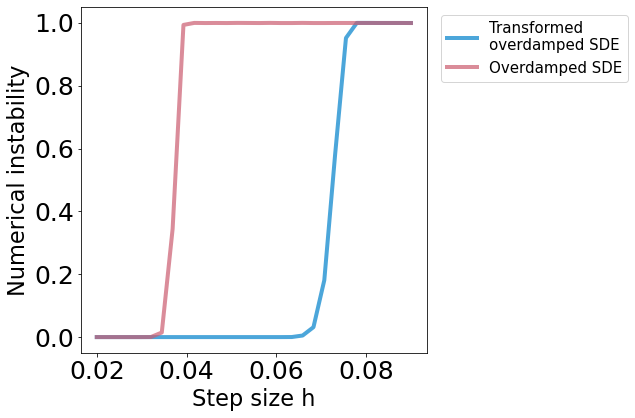

In [ ]:
from settings_and_potential import *

# ###########################################
# ## Set up the path
# ###########################################
os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/C/data_overdamped_2d")

# dtlist=np.array([0.01,0.02,0.03,0.04,0.05])
dtlist=np.linspace(0.02,0.09,30)
# ###########################################
# ## Interpolate the slope
# ###########################################

# ###########################################
# ## Compute the log moments
# ###########################################
fig, (ax1)= plt.subplots(1,1,figsize=(6,6))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

## no adaptive 
###############
lab="Overdamped"

# Upload moments
mom4_list_noada=np.hstack(openCfile("noada_moment4.txt"))
mom4_list_tr=np.hstack(openCfile("tr_moment4.txt"))

ax1.plot(dtlist,mom4_list_tr,linewidth=lw,alpha=0.7,label='Transformed\noverdamped SDE',color=myblue)
ax1.plot(dtlist,mom4_list_noada,linewidth=lw,alpha=0.7,label='Overdamped SDE',color=myred)
ax1.set_ylabel("Numerical instability",fontsize=font_size*0.5)
ax1.legend(fontsize=font_size/3,ncol=1,bbox_to_anchor=(1.02, 1), loc='upper left')
ax1.set_xlabel("Step size h",fontsize=font_size*0.5)

In [22]:
# np.round(np.linspace(-5.8,-3.5,10),3)
np.round(np.exp(np.linspace(-5.8,-3.5,10)),4)

array([0.003 , 0.0039, 0.005 , 0.0065, 0.0084, 0.0109, 0.014 , 0.0181,
       0.0234, 0.0302])